In [1]:
import os
import pandas as pd
import pickle

In [2]:
train_df = pd.read_csv('Data/train.csv')
val_df = pd.read_csv('Data/val.csv')
test_df = pd.read_csv('Data/test.csv')

In [3]:
print(train_df.shape, val_df.shape, test_df.shape)

(162770, 44) (19867, 43) (19962, 43)


In [4]:
train_client = set(train_df['client_id'].unique().tolist())
val_client = set(val_df['client_id'].unique().tolist())
test_client = set(test_df['client_id'].unique().tolist())

In [5]:
print(f"Train has {len(train_client)} clients, Valid has {len(val_client)} clients, and Test has {len(test_client)} clients")

Train has 8192 clients, Valid has 985 clients, and Test has 1000 clients


In [6]:
len(train_client.intersection(test_client))

0

In [7]:
temp = train_df.groupby('client_id').count()

In [8]:
temp[temp['image_id'] > 10].shape

(6574, 43)

<AxesSubplot:>

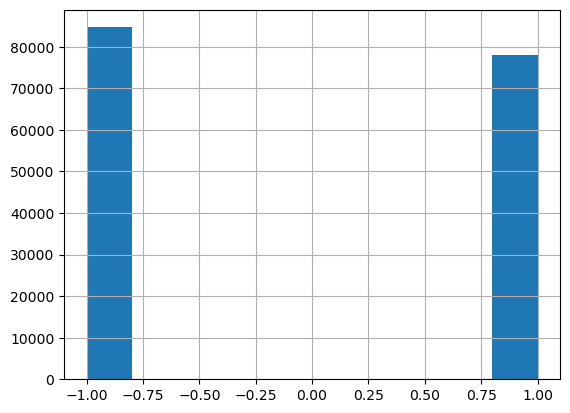

In [9]:
train_df['Smiling'].hist()

<AxesSubplot:>

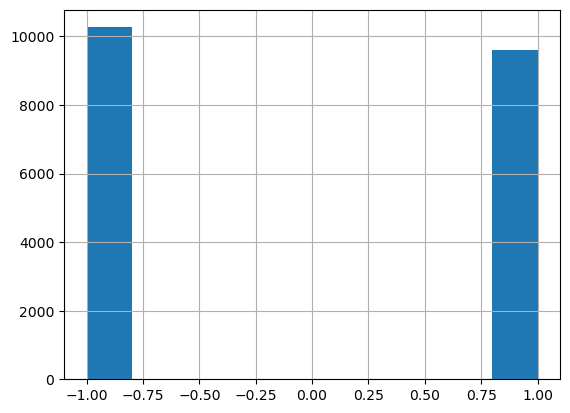

In [10]:
val_df['Smiling'].hist()

<AxesSubplot:>

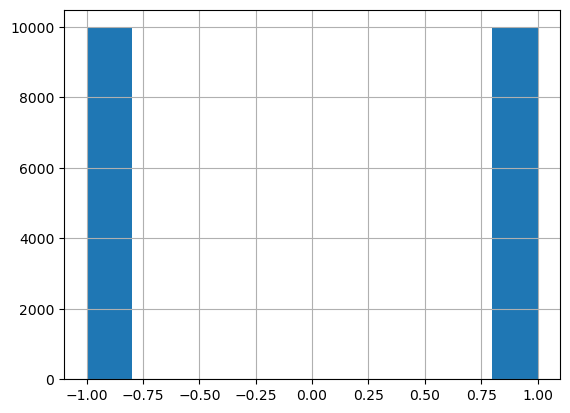

In [11]:
test_df['Smiling'].hist()

In [17]:
temp = train_df.groupby('client_id').count().sample(frac=1, random_state=2).cumsum()
tr_client_id = list(temp[temp['image_id'] <= 81385].index)
aux_client_id = list(temp[temp['image_id'] > 81385].index)
tr_df = train_df[train_df['client_id'].isin(tr_client_id)].copy().reset_index(drop=True)
aux_df = train_df[train_df['client_id'].isin(aux_client_id)].copy().reset_index(drop=True)

<AxesSubplot:>

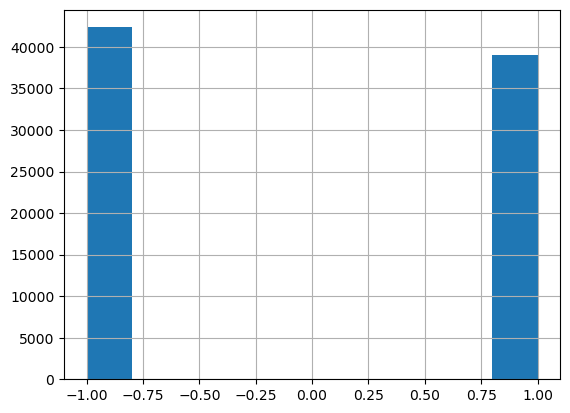

In [18]:
tr_df['Smiling'].hist()

<AxesSubplot:>

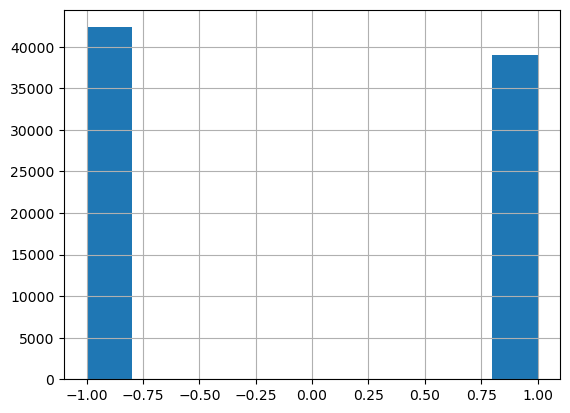

In [19]:
aux_df['Smiling'].hist()

<AxesSubplot:>

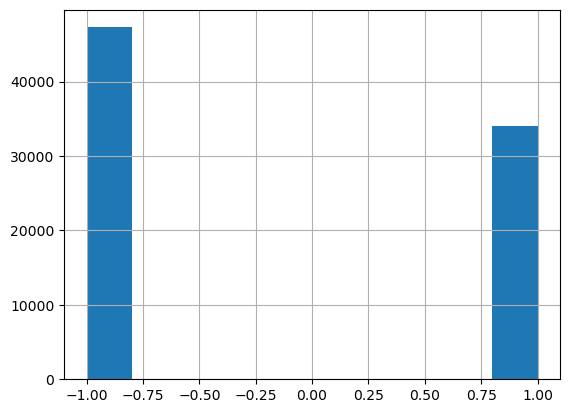

In [15]:
tr_df['Male'].hist()

<AxesSubplot:>

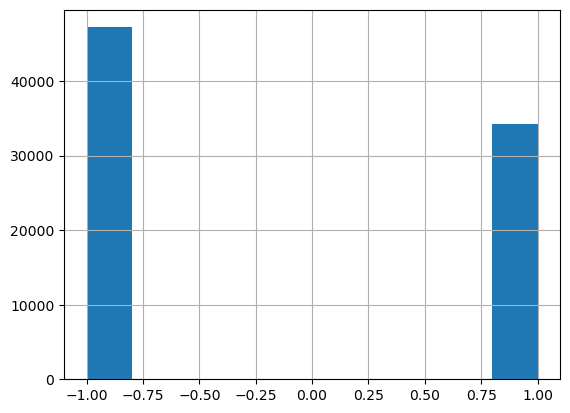

In [16]:
aux_df['Male'].hist()

In [2]:
id_df = pd.read_csv('Data/identity_CelebA.txt', delimiter=' ', header=None)
id_df.columns = ['image_id', 'client_id']
id_df.head()

,image_id,client_id
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


In [3]:
part_df = pd.read_csv('Data/list_eval_partition.txt', delimiter=' ', header=None)
part_df.columns = ['image_id', 'train_eval_test']
part_df.head()

,image_id,train_eval_test
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [4]:
prop_df = pd.read_csv('Data/list_attr_celeba.txt', sep=r"\s+", skiprows=1)
prop_df['image_id'] = prop_df.index
prop_df = prop_df.reset_index(drop=True)
prop_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,image_id
0,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,000001.jpg
1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,000002.jpg
2,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,000003.jpg
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,000004.jpg
4,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,000005.jpg


In [5]:
prop_df = prop_df.merge(id_df, on='image_id')
prop_df = prop_df.merge(part_df, on='image_id')
prop_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,image_id,client_id,train_eval_test
0,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,000001.jpg,2880,0
1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,000002.jpg,2937,0
2,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,1,000003.jpg,8692,0
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,000004.jpg,5805,0
4,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,000005.jpg,9295,0


In [6]:
train_df = prop_df[prop_df['train_eval_test'] == 0].copy().reset_index(drop=True)
eval_df = prop_df[prop_df['train_eval_test'] == 1].copy().reset_index(drop=True)
test_df = prop_df[prop_df['train_eval_test'] == 2].copy().reset_index(drop=True)

In [7]:
print(train_df.shape, eval_df.shape, test_df.shape)

(162770, 43) (19867, 43) (19962, 43)


In [8]:
train_df['client_id'].value_counts()

2820    35
3699    34
3745    34
8968    32
9152    32
        ..
9467     1
8159     1
1965     1
9280     1
8591     1
Name: client_id, Length: 8192, dtype: int64

In [8]:
train_df.to_csv('Data/train.csv', index=False)
eval_df.to_csv('Data/val.csv', index=False)
test_df.to_csv('Data/test.csv', index=False)

In [9]:
eval_df['client_id'].value_counts()

3782    35
3227    35
4740    31
1306    30
1542    30
        ..
3690     1
4273     1
2264     1
3613     1
2708     1
Name: client_id, Length: 985, dtype: int64

In [10]:
test_df['client_id'].value_counts()

9256    32
4978    31
7760    30
4992    30
6657    30
        ..
5992     2
6584     2
7778     1
8585     1
8565     1
Name: client_id, Length: 1000, dtype: int64

In [11]:
aux_df = train_df.sample(frac=0.5, replace=False)
print(aux_df.shape, train_df.shape)

(81385, 43) (162770, 43)


In [14]:
not_in_aux_df = train_df.drop(aux_df.index)

In [15]:
print(aux_df.shape, not_in_aux_df.shape, train_df.shape)

(81385, 43) (81385, 43) (162770, 43)


In [16]:
aux_df['client_id'].value_counts()

6231    24
3338    24
2991    24
7874    23
6346    23
        ..
8680     1
725      1
3235     1
6358     1
1414     1
Name: client_id, Length: 8048, dtype: int64

In [46]:
temp = train_df.groupby('client_id').count()
temp

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,image_id,train_eval_test
client_id,,,,,,,,,,,,,,,,,,,,,
1,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
5,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
10174,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
10175,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [47]:
temp = temp.sort_values(by=['image_id'], ascending=False)
temp

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,image_id,train_eval_test
client_id,,,,,,,,,,,,,,,,,,,,,
2820,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
3745,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
3699,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
9152,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
8968,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8591,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1734,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [48]:
temp = temp.cumsum()
temp

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,image_id,train_eval_test
client_id,,,,,,,,,,,,,,,,,,,,,
2820,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
3745,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
3699,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
9152,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
8968,167,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,162766,162766,162766,162766,162766,162766,162766,162766,162766,162766,...,162766,162766,162766,162766,162766,162766,162766,162766,162766,162766
8591,162767,162767,162767,162767,162767,162767,162767,162767,162767,162767,...,162767,162767,162767,162767,162767,162767,162767,162767,162767,162767
1734,162768,162768,162768,162768,162768,162768,162768,162768,162768,162768,...,162768,162768,162768,162768,162768,162768,162768,162768,162768,162768


In [49]:
temp[temp['image_id'] <= 81385].index

Int64Index([2820, 3745, 3699, 9152, 8968, 2114, 4887, 9840, 1757, 6568,
            ...
            2400, 3079, 3045, 3048, 2642, 3303, 1425, 2424,  693, 2432],
           dtype='int64', name='client_id', length=2783)

In [50]:
temp[temp['image_id'] > 81385].index

Int64Index([1781, 1313, 2998, 1894, 9885, 9352,  167,  170,  825, 9357,
            ...
            4274, 7643, 9467, 4026, 8588, 9075, 8591, 1734, 9770, 9966],
           dtype='int64', name='client_id', length=5409)

In [57]:
temp = train_df.groupby('client_id').sum()['Male'].apply(lambda x: 1 if x > 0 else 0)

In [64]:
gender_dict = dict(zip(list(temp.index), temp.values.tolist()))

In [69]:
train_df['gender'] = train_df['client_id'].map(gender_dict)
train_df.sort_values(by='client_id').groupby('client_id').mean()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,train_eval_test,gender
client_id,,,,,,,,,,,,,,,,,,,,,
1,-0.310345,-0.931034,-0.448276,-0.172414,-1.0,-1.000000,-1.000000,-0.586207,-0.931034,-0.793103,...,0.034483,-1.000000,-1.000000,-0.793103,-1.000000,-1.000000,-1.000000,0.379310,0.0,1.0
2,-1.000000,-0.750000,0.750000,-0.750000,-1.0,-0.500000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.250000,-0.750000,-0.750000,-1.000000,0.000000,-0.750000,-1.000000,1.000000,0.0,0.0
3,-1.000000,-1.000000,0.360000,-1.000000,-1.0,-1.000000,-0.920000,-0.200000,-0.760000,-1.000000,...,-1.000000,-0.680000,-0.360000,0.440000,-0.760000,-0.760000,-0.840000,1.000000,0.0,1.0
4,-1.000000,-0.363636,0.909091,-0.909091,-1.0,-0.636364,-1.000000,-0.545455,-1.000000,0.727273,...,-0.727273,0.363636,-0.454545,-1.000000,0.909091,-0.818182,-1.000000,1.000000,0.0,0.0
5,-1.000000,-0.900000,0.500000,-1.000000,-1.0,0.100000,-1.000000,-0.600000,0.800000,-1.000000,...,-0.200000,-1.000000,-1.000000,-0.800000,-0.800000,-0.800000,-0.900000,1.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,-1.000000,0.000000,-0.800000,-0.866667,-1.0,-1.000000,-0.266667,-0.933333,-1.000000,0.066667,...,-0.933333,0.400000,0.533333,-0.933333,0.466667,0.133333,-0.933333,-0.933333,0.0,0.0
10174,-1.000000,0.733333,0.600000,-0.933333,-1.0,-0.933333,0.200000,-1.000000,-0.533333,-0.933333,...,-1.000000,0.200000,0.000000,-1.000000,0.533333,-0.733333,-1.000000,1.000000,0.0,0.0
10175,-1.000000,0.400000,0.666667,-1.000000,-1.0,-1.000000,0.666667,-0.933333,0.866667,-1.000000,...,-0.933333,0.733333,-0.400000,-1.000000,0.666667,-0.466667,-1.000000,1.000000,0.0,0.0


In [71]:
train_df.to_csv('Data/train.csv', index=False)

In [59]:
train_df.join(temp, on='client_id')

ValueError: columns overlap but no suffix specified: Index(['Male'], dtype='object')